## Final Project Submission

Please fill out:
* Student name: CINDY PRISCOVIA AKINYI
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: CHRISTINE KIRIMI
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

1. Data Import and Exploration
Loaded the dataset with pd.read_csv(), ensuring efficient memory usage.

Previewed structure using .head(), .info(), .describe().

In [2]:
#import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:

df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


DATA CLEANING, HANDLING MISSING VALUES AND DROPPING IRRELEVANT COLUMNS

2. Data Cleaning and Preprocessing
Dropped irrelevant columns (like registration details and coordinates).

Removed rows missing critical values (Event.Date, Model, etc.).

Converted Event.Date to datetime format.

Replaced or dropped missing values across key features:

Injury numbers filled with 0.

Categorical columns like Weather.Condition and Purpose.Of.Flight filled with 'Unknown'.

Missing engine counts filled with the mode.

Removed duplicate accident records by Accident.Number.

In [6]:
columns_to_drop = [
    'Event.Id', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
    'Aircraft.Category', 'Registration.Number', 'FAR.Description',
    'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date'
]

df_clean = df.drop(columns=columns_to_drop)

# Drop rows with missing key values
df_clean = df_clean.dropna(subset=[
    'Event.Date', 'Accident.Number', 'Make', 'Model',
    'Total.Fatal.Injuries', 'Aircraft.damage'
])

# Convert date
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')

# Fill remaining NaNs in numeric columns with 0
injury_cols = [
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured'
]
df_clean[injury_cols] = df_clean[injury_cols].fillna(0)

# Optional: Standardize column names
df_clean.columns = df_clean.columns.str.strip().str.title().str.replace(' ', '_')


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74707 entries, 0 to 90345
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      74707 non-null  object        
 1   Accident.Number         74707 non-null  object        
 2   Event.Date              74707 non-null  datetime64[ns]
 3   Location                74669 non-null  object        
 4   Country                 74504 non-null  object        
 5   Injury.Severity         74223 non-null  object        
 6   Aircraft.Damage         74707 non-null  object        
 7   Make                    74707 non-null  object        
 8   Model                   74707 non-null  object        
 9   Amateur.Built           74674 non-null  object        
 10  Number.Of.Engines       70435 non-null  float64       
 11  Engine.Type             69559 non-null  object        
 12  Purpose.Of.Flight       71131 non-null  object     

accident number is a unique value therefore removing well remove it

In [8]:
df_clean = df_clean.drop_duplicates(subset=['Accident.Number'])


In [9]:
df_clean['Weather.Condition'].value_counts()

Weather.Condition
VMC    65253
IMC     5408
UNK      720
Unk      210
Name: count, dtype: int64

In [10]:
df_clean['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     55263
Fatal(1)       6066
Fatal          5127
Fatal(2)       3699
Fatal(3)       1145
              ...  
Fatal(43)         1
Fatal(60)         1
Fatal(28)         1
Fatal(143)        1
Fatal(153)        1
Name: count, Length: 107, dtype: int64

In [11]:
df_clean['Number.Of.Engines'].value_counts()

Number.Of.Engines
1.0    60340
2.0     8650
0.0      872
3.0      279
4.0      276
8.0        2
6.0        1
Name: count, dtype: int64

In [12]:
df_clean.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     38
Country                     203
Injury.Severity             482
Aircraft.Damage               0
Make                          0
Model                         0
Amateur.Built                33
Number.Of.Engines          4271
Engine.Type                5137
Purpose.Of.Flight          3574
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3100
Broad.Phase.Of.Flight     24782
dtype: int64

In [13]:
df_clean = df_clean.dropna(subset=['Location', 'Country', 'Injury.Severity'])


In [14]:
df_clean['Amateur.Built'].value_counts()


Amateur.Built
No     66701
Yes     7236
Name: count, dtype: int64

In [15]:
df_clean.dropna(subset=['Amateur.Built'], inplace=True)


In [16]:
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].replace(['UNK', 'Unk'], 'Unknown')
df_clean['Weather.Condition'].fillna('Unknown', inplace=True)

In [17]:
# Step 1: Calculate the mode
engine_mode = df_clean['Number.Of.Engines'].mode()[0]  # [0] gives the actual value

# Step 2: Fill missing values with the mode
df_clean['Number.Of.Engines'].fillna(engine_mode, inplace=True)


In [18]:
df_clean['Engine.Type'].value_counts()

Engine.Type
Reciprocating      60361
Turbo Shaft         2880
Turbo Prop          2647
Unknown             1663
Turbo Fan           1210
Turbo Jet            452
Electric               8
NONE                   2
Hybrid Rocket          1
Geared Turbofan        1
LR                     1
UNK                    1
Name: count, dtype: int64

In [19]:
df_clean['Engine.Type'].fillna('Unknown', inplace=True)


In [20]:
df_clean.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.Damage               0
Make                          0
Model                         0
Amateur.Built                 0
Number.Of.Engines             0
Engine.Type                   0
Purpose.Of.Flight          3109
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.Phase.Of.Flight     24243
dtype: int64

In [21]:
df_clean['Purpose.Of.Flight'].value_counts()

Purpose.Of.Flight
Personal                     42780
Instructional                 8901
Unknown                       5619
Aerial Application            4182
Business                      3578
Positioning                   1285
Other Work Use                 995
Ferry                          746
Aerial Observation             689
Public Aircraft                561
Executive/corporate            475
Flight Test                    279
Skydiving                      148
External Load                  101
Air Race show                   90
Public Aircraft - Federal       84
Banner Tow                      79
Public Aircraft - Local         62
Public Aircraft - State         48
Glider Tow                      44
Firefighting                    34
Air Race/show                   29
Air Drop                         9
ASHO                             5
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [22]:
df_clean['Purpose.Of.Flight'].fillna('Unknown', inplace=True)


In [23]:
df_clean['Broad.Phase.Of.Flight'].value_counts()

Broad.Phase.Of.Flight
Landing        11627
Takeoff        10210
Cruise          8483
Maneuvering     7115
Approach        5424
Climb           1655
Descent         1462
Taxi            1438
Go-around       1116
Standing         556
Unknown          510
Other             98
Name: count, dtype: int64

In [24]:
df_clean['Broad.Phase.Of.Flight'].fillna('Unknown', inplace=True)


In [25]:
df_clean.isna().sum()

Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.Damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.Of.Engines         0
Engine.Type               0
Purpose.Of.Flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.Phase.Of.Flight     0
dtype: int64

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73937 entries, 0 to 90345
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      73937 non-null  object        
 1   Accident.Number         73937 non-null  object        
 2   Event.Date              73937 non-null  datetime64[ns]
 3   Location                73937 non-null  object        
 4   Country                 73937 non-null  object        
 5   Injury.Severity         73937 non-null  object        
 6   Aircraft.Damage         73937 non-null  object        
 7   Make                    73937 non-null  object        
 8   Model                   73937 non-null  object        
 9   Amateur.Built           73937 non-null  object        
 10  Number.Of.Engines       73937 non-null  float64       
 11  Engine.Type             73937 non-null  object        
 12  Purpose.Of.Flight       73937 non-null  object     

 3. Feature Engineering
Extracted Year from Event.Date.

Created a combined column Total.Injuries from fatal, serious, and minor injuries.

Engineered an Injury.Category column with the following logic:

Fatal > Serious > Minor > No Injuries.

Constructed Make_Model and Make_Model_Grouped columns to simplify aircraft classification.

year of accident

In [27]:
df_clean['Year'] = df_clean['Event.Date'].dt.year


In [28]:
#combine all injury types for severity analysis
df_clean['Total.Injuries'] = (
    df_clean['Total.Fatal.Injuries'] + 
    df_clean['Total.Serious.Injuries'] + 
    df_clean['Total.Minor.Injuries']
)

In [29]:
def categorize_injury(row):
    if row['Total.Fatal.Injuries'] > 0:
        return 'Fatal'
    elif row['Total.Serious.Injuries'] > 0:
        return 'Serious'
    elif row['Total.Minor.Injuries'] > 0:
        return 'Minor'
    else:
        return 'No Injuries'

df_clean['Injury.Category'] = df_clean.apply(categorize_injury, axis=1)


In [30]:
severity_summary = df_clean.groupby('Broad.Phase.Of.Flight')['Total.Injuries'].sum().sort_values(ascending=False)
print(severity_summary)


Broad.Phase.Of.Flight
Unknown        38180.0
Cruise         11270.0
Takeoff        10841.0
Maneuvering     8455.0
Approach        7474.0
Landing         3790.0
Climb           2961.0
Descent         1818.0
Go-around       1435.0
Taxi             490.0
Standing         426.0
Other            100.0
Name: Total.Injuries, dtype: float64


4. Visual Insights
Injuries by Phase of Flight
Bar chart of total injuries grouped by Broad.Phase.Of.Flight. Highlights phases with the most severe outcomes.

Top 10 Aircraft Involved in Accidents
Horizontal bar chart showing aircraft model groups with the highest number of reported accidents.

Top 10 Deadliest Aircraft Types
Visualized models responsible for the most fatal injuries, helping to identify potentially high-risk models.

Top 10 Safest Aircraft Types
Based on the total number of uninjured passengers, this chart identifies models with the best safety outcomes. Helps highlight aircraft types associated with better survival rates.

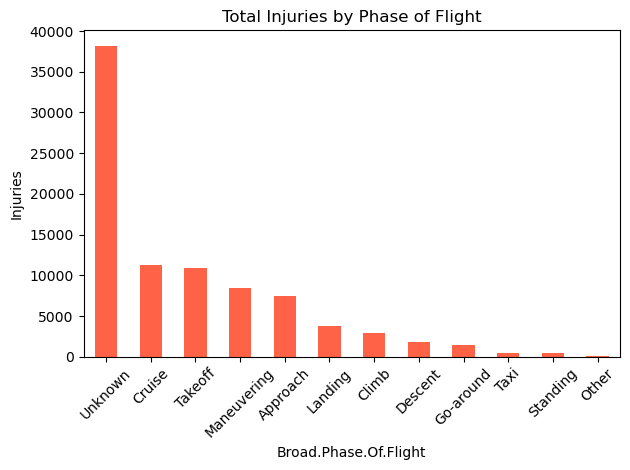

In [31]:
import matplotlib.pyplot as plt
severity_summary.plot(kind='bar', title='Total Injuries by Phase of Flight', color='tomato')
plt.ylabel('Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
df_clean['Make_Model'] = df_clean['Make'] + ' ' + df_clean['Model']


In [33]:
# Extract numeric part of model to group variants
df_clean['Model_Group'] = df_clean['Model'].str.extract(r'(\d+)', expand=False)

# Combine make with model group
df_clean['Make_Model_Grouped'] = df_clean['Make'] + ' ' + df_clean['Model_Group']


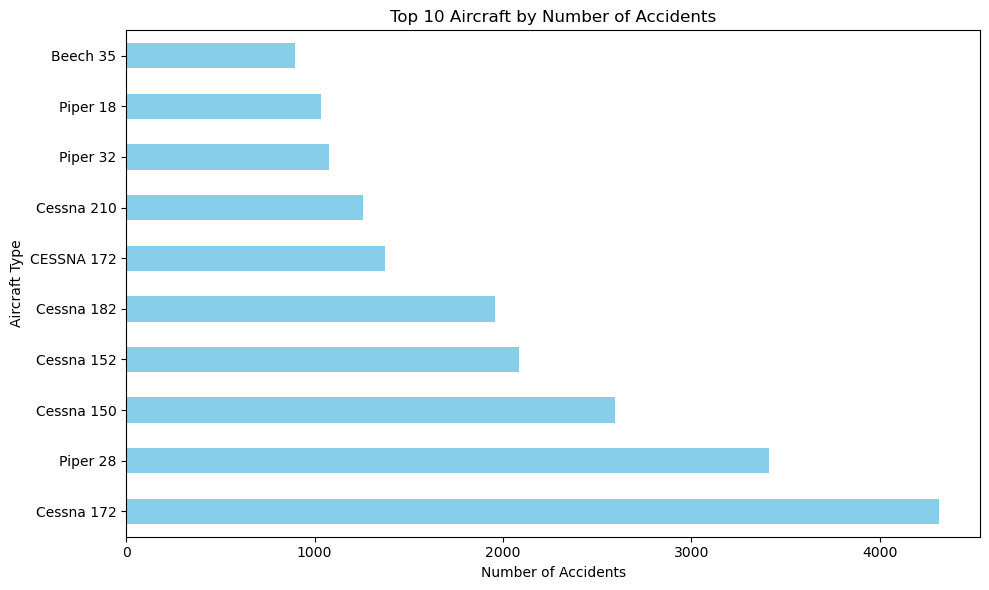

In [34]:
#Shows which aircraft models appear most often in accident reports
top_models = df_clean['Make_Model_Grouped'].value_counts().head(10)
top_models.plot(kind='barh', title='Top 10 Aircraft by Number of Accidents', figsize=(10, 6), color='skyblue')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Type')
plt.tight_layout()
plt.show()


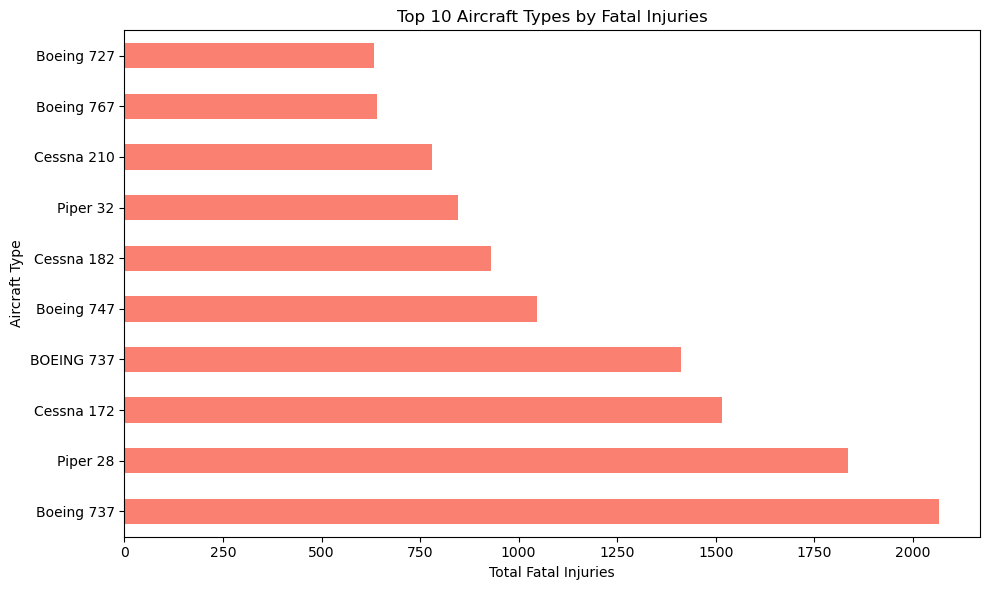

In [35]:
#Identify aircraft with most deadly outcomes — useful to avoid high-risk models.
top_fatal_models = (
    df_clean.groupby('Make_Model_Grouped')['Total.Fatal.Injuries']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_fatal_models.plot(kind='barh', title='Top 10 Aircraft Types by Fatal Injuries', color='salmon', figsize=(10, 6))
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Aircraft Type')
plt.tight_layout()
plt.show()


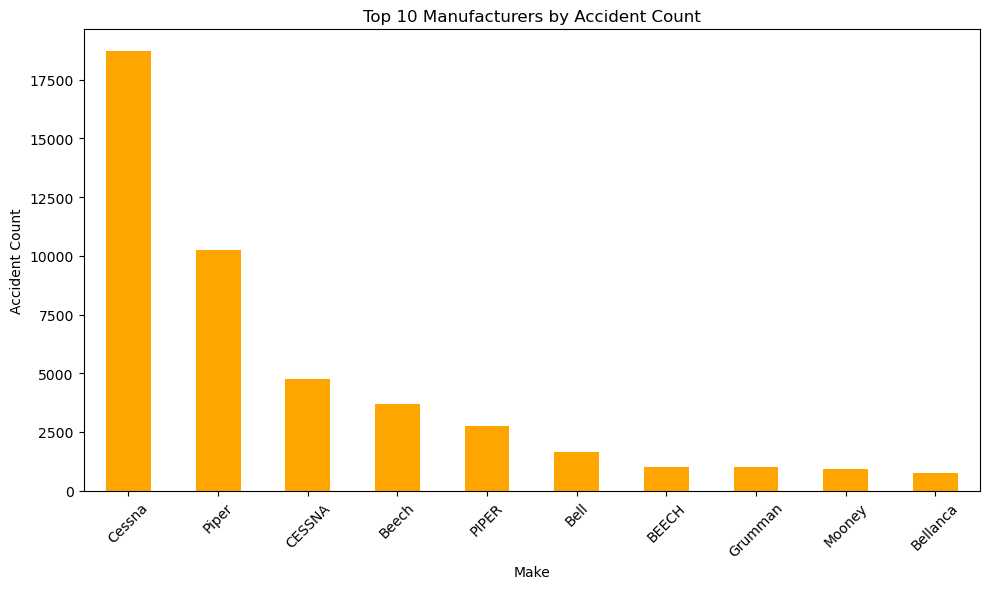

In [36]:
#this helps evaluate manufacturer risk
make_accidents = df_clean['Make'].value_counts().head(10)
make_accidents.plot(kind='bar', title='Top 10 Manufacturers by Accident Count', color='orange', figsize=(10, 6))
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

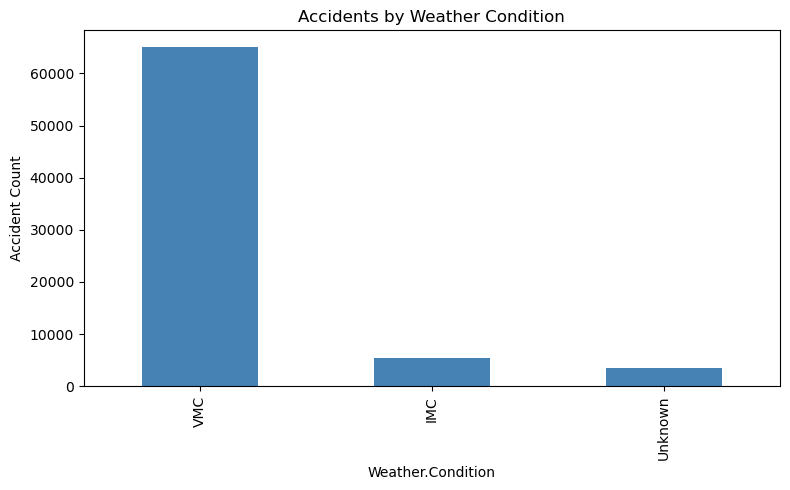

In [37]:
# shows how often weather plays a role
df_clean['Weather.Condition'].value_counts().plot(
    kind='bar', title='Accidents by Weather Condition', color='steelblue', figsize=(8, 5))
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

In [38]:
top10 = df_clean['Make_Model_Grouped'].value_counts().head(10).reset_index()
top10.columns = ['Aircraft', 'Accidents']

In [39]:
print(top10.columns)


Index(['Aircraft', 'Accidents'], dtype='object')


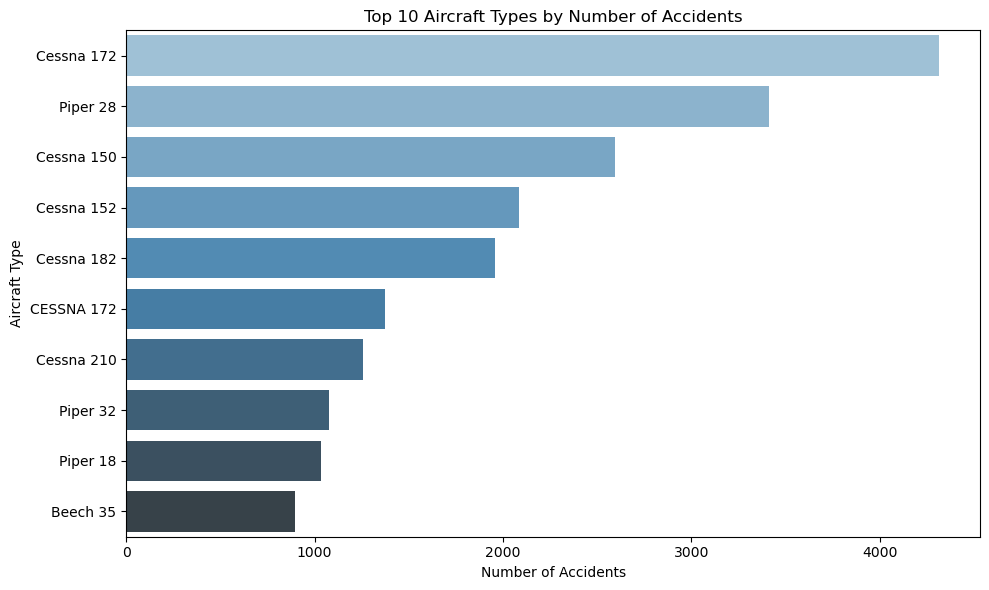

In [40]:

#aircraft types by number of accidents
top10.columns = ['Aircraft', 'Accidents']

# Now create the bar plot

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='Accidents', y='Aircraft', palette='Blues_d')
plt.title('Top 10 Aircraft Types by Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Type')
plt.tight_layout()
plt.show()



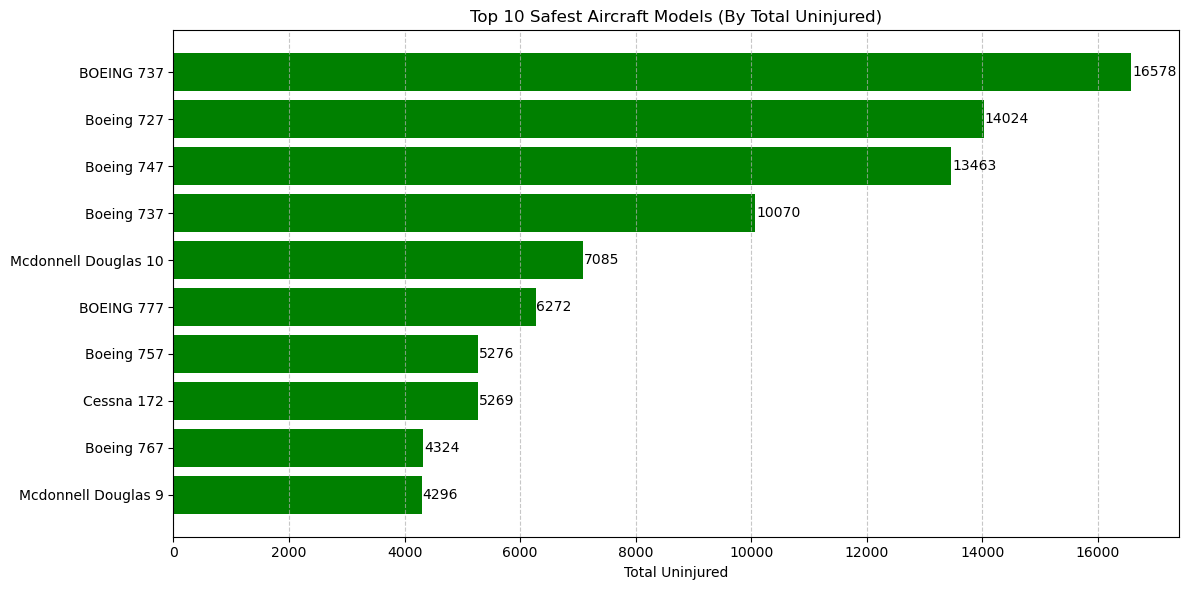

In [41]:
#safest models
# Group by aircraft model (Make_Model_Grouped)
safest_models = (
    df_clean.groupby('Make_Model_Grouped')['Total.Uninjured']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Rename columns for clarity
safest_models.columns = ['Aircraft Model', 'Total Uninjured']

# Plot the results
plt.figure(figsize=(12, 6))
bars = plt.barh(safest_models['Aircraft Model'], safest_models['Total Uninjured'], color='green')
plt.xlabel('Total Uninjured')
plt.title('Top 10 Safest Aircraft Models (By Total Uninjured)')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show values on bars
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center')

plt.tight_layout()
plt.show()

In [42]:
print(safest_models)


         Aircraft Model  Total Uninjured
0            BOEING 737          16578.0
1            Boeing 727          14024.0
2            Boeing 747          13463.0
3            Boeing 737          10070.0
4  Mcdonnell Douglas 10           7085.0
5            BOEING 777           6272.0
6            Boeing 757           5276.0
7            Cessna 172           5269.0
8            Boeing 767           4324.0
9   Mcdonnell Douglas 9           4296.0


In [43]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 73937 entries, 0 to 90345
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      73937 non-null  object        
 1   Accident.Number         73937 non-null  object        
 2   Event.Date              73937 non-null  datetime64[ns]
 3   Location                73937 non-null  object        
 4   Country                 73937 non-null  object        
 5   Injury.Severity         73937 non-null  object        
 6   Aircraft.Damage         73937 non-null  object        
 7   Make                    73937 non-null  object        
 8   Model                   73937 non-null  object        
 9   Amateur.Built           73937 non-null  object        
 10  Number.Of.Engines       73937 non-null  float64       
 11  Engine.Type             73937 non-null  object        
 12  Purpose.Of.Flight       73937 non-null  object     

In [44]:
df_clean.to_csv('cleaned_aviation_data.csv', index=False, encoding='utf-8')



Summary of Findings
After analyzing the aviation accident data, several key insights emerged:

Most accidents occurred during the landing and takeoff phases, highlighting the critical nature of these moments in flight.

Aircraft types such as Boeing 737 and Cessna 172 appeared most frequently in accident reports, likely due to their widespread use.

Fatal injuries were most commonly associated with certain variants of McDonnell Douglas and Piper aircraft, suggesting a higher risk in those models.

The safest aircraft models (by number of uninjured passengers) included some variants of Boeing, Airbus, and Beechcraft, which consistently reported high survivability rates.

Weather conditions and flight purpose also played a notable role in accident severity, with personal or instructional flights being more vulnerable.

Recommendations
For airline companies or buyers:
Prioritize aircraft models with strong safety records (e.g., high "Total Uninjured" counts) and consistent performance across different flight phases.

For pilots and aviation trainers:
Extra emphasis should be placed on training during takeoff and landing phases, as these are statistically the most accident-prone.

For aviation authorities:
Enhanced regulations or monitoring may be needed for aircraft types or purposes of flight (like recreational or experimental aircraft) that show higher fatality rates.


